In [1]:
import os
import sys
this = os.getcwd()
path = this[:this.rfind("/")]
if not path in sys.path: sys.path.append(path)
xgboost_path = path + "/xgboost_regressor"
promedios_path = path + "/promedio_zona"

import pandas as pd
import matplotlib
from datos import FEATURES_DISPONIBLES
from modelo import Modelo

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from xgboost_regressor.xgboost_predictor import XGBoostRegressor
from promedio_zona.promedio_zona import PromedioZona

In [3]:
class EnsamblePromedioXGBoostConcatenados(XGBoostRegressor):
    """
        Usa el resultado de las predicciones del modelo PromedioZona
        para entrenar y predecir con un XGBoostRegressor.
    """
    
    
    @Modelo.cronometrar()
    def __init__(self):
        self.modelo_promedios = PromedioZona()
        super().__init__()        
        
    @Modelo.cronometrar()
    def cargar_datos(self):
        self.modelo_promedios.cargar_datos()
        super().cargar_datos()
    
    @Modelo.cronometrar()
    def entrenar(self):
        self.modelo_promedios.entrenar()
        predicciones_train =  self.modelo_promedios.predecir(self.modelo_promedios.train_data)
        predicciones_test = self.modelo_promedios.predecir(self.modelo_promedios.test_data)
        predicciones_submit = self.modelo_promedios.predecir(self.modelo_promedios.submit_data)
        self.train_data['prediccion_promedios'] = predicciones_train['target']
        self.test_data['prediccion_promedios'] = predicciones_test['target']
        self.submit_data['prediccion_promedios'] = predicciones_submit['target']
        super().entrenar()


In [4]:
ensamble = EnsamblePromedioXGBoostConcatenados()

instanciar demoro 0.0 segundos
instanciar demoro 0.0 segundos
__init__ demoro 0.0 segundos


In [5]:
ensamble.cargar_datos()

cargar demoro 1.45 segundos
cargar demoro 72.31 segundos
cargar_datos demoro 78.32 segundos


In [6]:
set(ensamble.modelo_promedios.submit_data.index.values) == set(ensamble.submit_data.index.values)

True

In [7]:
ensamble.entrenar()

entrenar demoro 0.0 segundos
entrenar demoro 0.15 segundos
predecir demoro 21.18 segundos
predecir demoro 7.76 segundos
predecir demoro 9.08 segundos
[01:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
entrenar demoro 0.0 segundos
entrenar demoro 307.86 segundos
entrenar demoro 346.05 segundos


In [8]:
ensamble.validar()

predecir demoro 3.16 segundos
puntuar demoro 0.0 segundos
validar demoro 3.16 segundos


622174.75

In [10]:
predicciones = ensamble.predecir(ensamble.submit_data)

predecir demoro 3.11 segundos


In [11]:
comentario = "Con dolar, año y mes - local 622174.75"
ensamble.presentar(predicciones, comentario)

guardar demoro 0.13 segundos


100%|██████████| 968k/968k [00:06<00:00, 159kB/s] 


submit demoro 7.8 segundos
presentar demoro 7.94 segundos


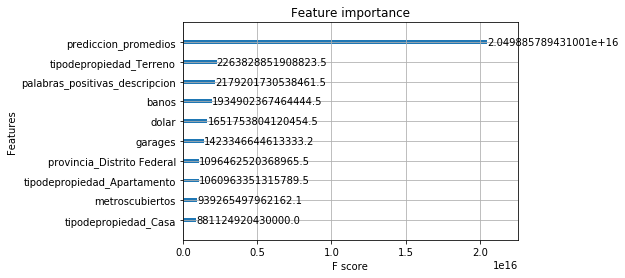

In [13]:
import xgboost as xgb
import matplotlib as plt
plot = xgb.plot_importance(ensamble.model, max_num_features=10, importance_type='gain')